In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
df.shape

(400, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [6]:
df.copy().isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: title={'center': 'Purchase Distribution'}, xlabel='Purchase (0=No,1=Yes)', ylabel='No. of Customers'>

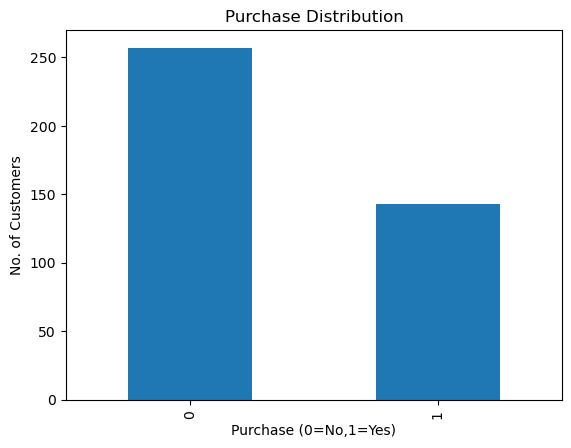

In [7]:
df["Purchased"].value_counts().plot(
kind="bar",
title="Purchase Distribution",
xlabel="Purchase (0=No,1=Yes)",
ylabel="No. of Customers"
)

<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Frequency'>

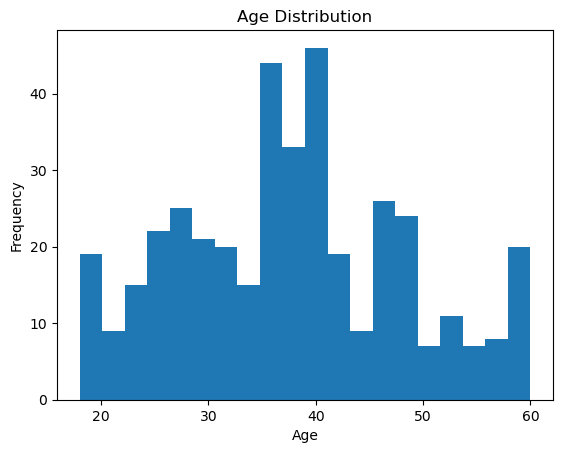

In [8]:
df["Age"].plot(
kind="hist",
bins=20,
title="Age Distribution",
xlabel="Age",
ylabel="Frequency"
)

<Axes: title={'center': 'Estimated Salary Distribution'}, xlabel='Estimated Salary', ylabel='Frequency'>

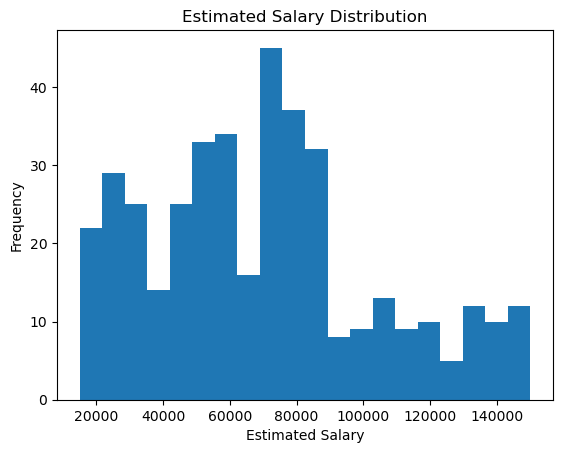

In [9]:
df["EstimatedSalary"].plot(
    kind="hist",
    bins=20,
    title="Estimated Salary Distribution",
    xlabel="Estimated Salary",
    ylabel="Frequency"
)


<Axes: title={'center': 'Age vs Salary with Purchase Outcome'}, xlabel='Age', ylabel='EstimatedSalary'>

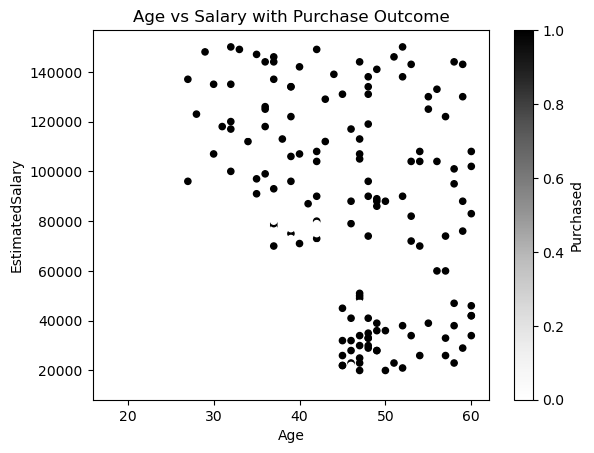

In [10]:
df.plot(
    kind="scatter",
    x="Age",
    y="EstimatedSalary",
    c="Purchased",
    title="Age vs Salary with Purchase Outcome"
)


In [11]:
X=df[["Age","EstimatedSalary"]]
y=df["Purchased"]

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
# k=4 was selected after testing multiple values to achieve stable performance
knn = KNeighborsClassifier(n_neighbors=4)

In [22]:
knn.fit(X_train,y_train)

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [23]:
y_pred=knn.predict(X_test)

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
cm_knn = confusion_matrix(y_test, y_pred)
acc_knn = accuracy_score(y_test, y_pred)

cm_knn, acc_knn


(array([[62, 10],
        [ 4, 44]]),
 0.8833333333333333)

In [25]:
nb=GaussianNB()
nb.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [26]:
y_pred_nb = nb.predict(X_test)


In [27]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
acc_nb = accuracy_score(y_test, y_pred_nb)

cm_nb, acc_nb


(array([[62, 10],
        [10, 38]]),
 0.8333333333333334)